# CS 3400 Machine Learning - Lab 2: Decision Boundaries
## Stuart Harley
### Introduction

In this lab, I will explore how decision boundaries are used by machine learning methods to classify data. I will plot the decision boundaries for fitted models with 1 or 2 features. I will use a decision boundary plot to determine whether a given decision boundary separates classes. I will use a decision boundary plot to determine whether the features for the model have enough predictive power to separate the classes. I will describe why experimental setup is important for model evaluation. I will interpret a metric to assess the quality of a model’s predictions and choose between two models (model selection). And I will relate a given classification metric to a decision boundary plot.

I will primarily draw on a popular  machine  learning  data  set  called  the Iris  data  set.    The author  of  the  data  set  measured  the  sepal  and  petal  widths  and lengths of 150 flowers from three species.  The data set has four numerical independent variables and a single categorical dependent variable(species).

## Reflection Questions

### Problem 1)

1) Just by looking at the plots, the decision boundary y=0.75x - 0.9 does the best job of separating the two classes of points because all but one point seem to be on the same side as those of the same color.

2) As expected, the decision boundary y=0.75x-0.9 gives the most accurate predictions, at 99.3%.

3) The accuracy metric seems to be a good metric of the decision boundary's ability to separate the classes. However, looking at the third boundary y=-0.2x+12, that boundary had an accuracy rating of 66% since it just marked all of them as the same class. So accuracy should not the only metric that should be used in a real world scenario.

### Problem 2)

1) The classes are more easily separated by the petal features than the sepal features.

2) Just by looking at the plots, again, the decision boundary does a better job of separating the classes based on the petal features.

3) The decision boundary y=-0.7x+5 gives the most accurate predictions of 95% based on the petal features.

4) It is important to choose features that do not overlap and have a clear boundary, because if they do overlap a lot, then the decision boundaries' ability to classify will be impaired. In order for a decision boundary to be effective, there has to be a boundary between the features.

### Problem 3)

1) The accuracy for the training set was greater than for the testing set. I think the testing set accuracy is a more realistic representation of the performance of the model. This is because the testing set is made up of new points the model is not trained on, so it is a better gauge for how it perform in the real world.

2) When looking at the plot of the validation data, the model will make several errors, predicting that several points are not setosa, when in fact they are setosa. It is possible to tell this, because several points of the setosa color are on the not setosa side of the decision boundary.

3) When looking at the training and testing plots, the testing set looks more representative of the validation set. Therefore the testing set will demonstrate errors similar to the validation set.

4) When looking at the accuracies of the training and testing sets, the testing set is very similar to the validation set. 85% and 86% respectively. While the training accuracy is much higher, at 99%. Therefore, the testing set accuracy is more representative of the validation set accuracy.

5) Training and evaluating a model on the same data set can be deceptive, because the model can learn rules for this particular data set that don't apply to data it will encounter in the real world. Aka, it is overfitting. However, because you are also evaluating the model on the same data set, it will appear to be performing very well since this is the data it was trained on.

6) Dividing data in training and testing sets without repeating points helps to resolve some of the issues in the previous answer. This is because the model will not be trained on points in the testing set, therefore when you run these new points through the model, it will not have been able to overfit on these points, so you should get a more realistic performance for the model in the real world.

7) 3 potential ramifications for publishing a model that was trained and characterized using the same data set: The issue here is that the model may not perform well when introduced to new data not in the data set. Therefore, it could give you some very bad results. Depending on where the model is being implemented, it could cause you to lose business because it behaves so poorly, people won't want to do business with you again. It could get someone killed for example if it is classifying cancer and is decides something isn't cancer when it is. Or it could get you sued for negligence because you knowingly didn't train the model correctly and you put it into use.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decision_boundaries import linear_decision_boundary_classifier
from sklearn.metrics import accuracy_score

## Exploring simple linear decision boundaries

### Loading and displaying the setosa data file into a pandas dataframe

In [2]:
setosa_df = pd.read_csv('setosa_data.csv')
setosa_df.head()

,label,sepal_length (cm),sepal_width (cm)
0,not setosa,5.1,3.5
1,not setosa,4.9,3.0
2,not setosa,4.7,3.2
3,not setosa,4.6,3.1
4,not setosa,5.0,3.6


### Creating a scatter plot of the setosa data. Plotting several decision boundaries of varying performance

In [3]:
def decision1(x):
    return 2 * x - 8;
def decision2(x):
    return .75 * x - .9;
def decision3(x):
    return -.2 * x + 12;

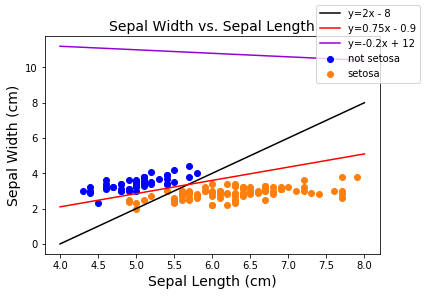

In [4]:
fig, axes = plt.subplots()
axes.scatter(setosa_df['sepal_length (cm)'][0:50], setosa_df['sepal_width (cm)'][0:50], color='b', label='not setosa')
axes.scatter(setosa_df['sepal_length (cm)'][50:], setosa_df['sepal_width (cm)'][50:], color='tab:orange', label='setosa')
axes.set_xlabel('Sepal Length (cm)', fontsize=14)
axes.set_ylabel('Sepal Width (cm)', fontsize=14)
axes.set_title('Sepal Width vs. Sepal Length', fontsize=14)
x = np.linspace(4, 8, 3)
y1 = decision1(x)
y2 = decision2(x)
y3 = decision3(x)
axes.plot(x, y1, color='k', label='y=2x - 8')
axes.plot(x, y2, color='r', label='y=0.75x - 0.9')
axes.plot(x, y3, color='darkviolet', label='y=-0.2x + 12')
fig.legend();

### Rewriting each decision boundary equation in a modified standard from
y = 2x-8 becomes 2x-y-8 = 0

y = 0.75x-0.9 becomes 0.75x-y-.9 = 0

y = -0.2x+12 becomes 0.2x+y-12=0

### Classifying the linear decision boundaries
Calculating the predicted values for each decision boundary and printing them out.

In [5]:
dec_bound_vec = np.array([2.0, -1.00, -8.0])
features = setosa_df[['sepal_length (cm)', 'sepal_width (cm)']].values
true_labels = setosa_df['label'].values
pred_labels1 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
print('2x-y-8 = 0')
print(pred_labels1)

2x-y-8 = 0
['not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'not setosa'
 'setosa' 'not setosa' 'not setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'not s

In [6]:
dec_bound_vec = np.array([0.75, -1.00, -0.90])
pred_labels2 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
print('0.75x-y-0.9 = 0')
print(pred_labels2)

0.75x-y-0.9 = 0
['not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'setosa' 'not setosa' 'not setosa' 'not setosa' 'not setosa'
 'not setosa' 'not setosa' 'not setosa' 'not setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa'

In [7]:
dec_bound_vec = np.array([0.2, 1.00, -12.0])
pred_labels3 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
print('0.2x+y-12 = 0')
print(pred_labels3)

0.2x+y-12 = 0
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 

Calculating the accuracy of the decision boundaries.

In [8]:
print('Accuracy of 2x-y-8 = 0        :   ' + str(round(accuracy_score(true_labels, pred_labels1)*100, 4)) + '%')
print('Accuracy of 0.75x-y-0.9 = 0   :   ' + str(round(accuracy_score(true_labels, pred_labels2)*100, 4)) + '%')
print('Accuracy of 0.2x+y-12 = 0     :   ' + str(round(accuracy_score(true_labels, pred_labels3)*100, 4)) + '%')

Accuracy of 2x-y-8 = 0        :   95.3333%
Accuracy of 0.75x-y-0.9 = 0   :   99.3333%
Accuracy of 0.2x+y-12 = 0     :   66.6667%


### Loading and displaying the versicolor/virginica data file into a pandas dataframe

In [9]:
versi_df = pd.read_csv('versicolor_virginica_data.csv')
versi_df.head()

,label,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm)
0,versicolor,7.0,3.2,4.7,1.4
1,versicolor,6.4,3.2,4.5,1.5
2,versicolor,6.9,3.1,4.9,1.5
3,versicolor,5.5,2.3,4.0,1.3
4,versicolor,6.5,2.8,4.6,1.5


### Creating scatter plots of the versicolor/virginica data. Plotting several decision boundaries of varying performance

In [10]:
def decision1(x):
    return -.7 * x + 7;
def decision2(x):
    return -.7 * x + 5;

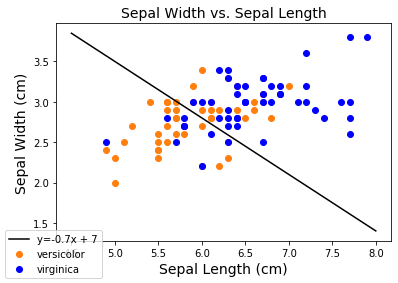

In [11]:
fig, axes = plt.subplots()
axes.scatter(versi_df['sepal_length (cm)'][0:50], versi_df['sepal_width (cm)'][0:50], color='tab:orange', label='versicolor')
axes.scatter(versi_df['sepal_length (cm)'][50:], versi_df['sepal_width (cm)'][50:], color='b', label='virginica')
axes.set_xlabel('Sepal Length (cm)', fontsize=14)
axes.set_ylabel('Sepal Width (cm)', fontsize=14)
axes.set_title('Sepal Width vs. Sepal Length', fontsize=14)
x = np.linspace(4.5, 8, 3)
y = decision1(x)
axes.plot(x, y, color='k', label='y=-0.7x + 7')
fig.legend(loc=3);

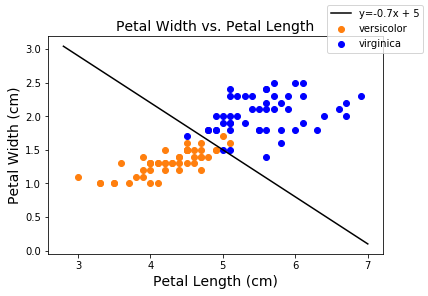

In [12]:
fig, axes = plt.subplots()
axes.scatter(versi_df['petal_length (cm)'][0:50], versi_df['petal_width (cm)'][0:50], color='tab:orange', label='versicolor')
axes.scatter(versi_df['petal_length (cm)'][50:], versi_df['petal_width (cm)'][50:], color='b', label='virginica')
axes.set_xlabel('Petal Length (cm)', fontsize=14)
axes.set_ylabel('Petal Width (cm)', fontsize=14)
axes.set_title('Petal Width vs. Petal Length', fontsize=14)
x = np.linspace(2.8, 7, 3)
y = decision2(x)
axes.plot(x, y, color='k', label='y=-0.7x + 5')
fig.legend();

### Rewriting each decision boundary equation in a modified standard from
y = -0.7x+7 becomes 0.7x+y-7 = 0

y = -0.7x+5 becomes 0.7x+y-5 = 0

### Classifying the linear decision boundaries
Calculating the predicted values for each decision boundary and printing them out.

In [13]:
dec_bound_vec = np.array([0.7, 1.0, -7])
features = versi_df[['sepal_length (cm)', 'sepal_width (cm)']].values
true_labels = versi_df['label'].values
pred_labels1 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
print('0.7x+y-7 = 0 : for the data dealing with sepals')
print(pred_labels1)

0.7x+y-7 = 0 : for the data dealing with sepals
['virgnica' 'virgnica' 'virgnica' 'versicolor' 'virgnica' 'versicolor'
 'virgnica' 'versicolor' 'virgnica' 'versicolor' 'versicolor' 'virgnica'
 'versicolor' 'virgnica' 'versicolor' 'virgnica' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virgnica' 'virgnica' 'versicolor' 'virgnica'
 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virgnica' 'virgnica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virgnica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virgnica' 'versicolor' 'versicolor' 'virgnica' 'versicolor'
 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'versicolor' 'virgnica'
 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'versicolor'
 'versicolor' 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'versicolor'
 'virgnica' 'versicolor' 'virgnica' 'virgnica' 'virgnica' 'virgnica'
 'virgnica' 'virgnica' 'virgnica'

In [14]:
dec_bound_vec = np.array([0.7, 1.0, -5])
features = versi_df[['petal_length (cm)', 'petal_width (cm)']].values
true_labels = versi_df['label'].values
pred_labels2 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
print('0.7x+y-5 = 0 : for the data dealing with petals')
print(pred_labels2)

0.7x+y-5 = 0 : for the data dealing with petals
['versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virgnica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virgnica' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virgnica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'virgnica'
 'versicolor' 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'virgnica'
 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'virgnica' 'virgnica'
 'virgnica' 'versicolor' 'virgnica' 'virgnica' 'virgnica' 'virgnica'
 'virgnica' 'virgnica' 'vi

Calculating the accuracy of the decision boundaries.

In [15]:
print('Accuracy of 0.7x+y-7 = 0 on sepal data   :   ' + str(accuracy_score(true_labels, pred_labels1)*100) + '%')
print('Accuracy of 0.7x+y-5 = 0 on petal data   :   ' + str(accuracy_score(true_labels, pred_labels2)*100) + '%')

Accuracy of 0.7x+y-7 = 0 on sepal data   :   70.0%
Accuracy of 0.7x+y-5 = 0 on petal data   :   95.0%


## Exploring how model overfitting and evaluating the model on the training set can be deceptive

### Creating scatter plots on the validation, training, and testing setosa data sets with a decision boundary

In [16]:
training_df = pd.read_csv('setosa_training.csv')
validation_df = pd.read_csv('setosa_validation.csv')
testing_df = pd.read_csv('setosa_testing.csv')

In [17]:
def decision(x):
    return 2 * x - 8;

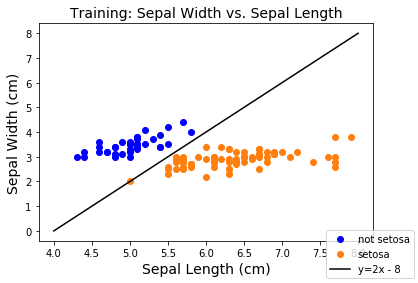

In [18]:
fig, axes = plt.subplots()
for row in range (training_df.shape[0]):
    if(training_df['label'][row] == 'setosa'):
        axes.scatter(training_df['sepal_length (cm)'][row],
            training_df['sepal_width (cm)'][row], color='tab:orange', label='setosa')
    else:
        axes.scatter(training_df['sepal_length (cm)'][row],
            training_df['sepal_width (cm)'][row], color='b', label='not setosa')
axes.set_xlabel('Sepal Length (cm)', fontsize=14)
axes.set_ylabel('Sepal Width (cm)', fontsize=14)
axes.set_title('Training: Sepal Width vs. Sepal Length', fontsize=14)
x = np.linspace(4, 8, 3)
y = decision(x)
axes.plot(x, y, color='k', label='y=2x - 8')
handles, labels = axes.get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
fig.legend(handles, labels, loc=4);

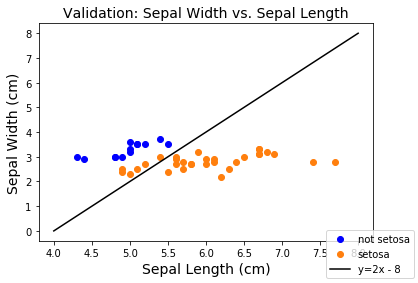

In [19]:
fig, axes = plt.subplots()
for row in range (validation_df.shape[0]):
    if(validation_df['label'][row] == 'setosa'):
        axes.scatter(validation_df['sepal_length (cm)'][row],
            validation_df['sepal_width (cm)'][row], color='tab:orange', label='setosa')
    else:
        axes.scatter(validation_df['sepal_length (cm)'][row],
            validation_df['sepal_width (cm)'][row], color='b', label='not setosa')
axes.set_xlabel('Sepal Length (cm)', fontsize=14)
axes.set_ylabel('Sepal Width (cm)', fontsize=14)
axes.set_title('Validation: Sepal Width vs. Sepal Length', fontsize=14)
x = np.linspace(4, 8, 3)
y = decision(x)
axes.plot(x, y, color='k', label='y=2x - 8')
handles, labels = axes.get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
fig.legend(handles, labels, loc=4);

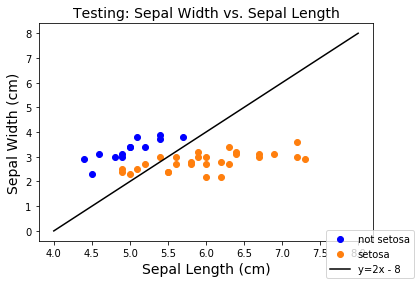

In [20]:
fig, axes = plt.subplots()
for row in range (testing_df.shape[0]):
    if(testing_df['label'][row] == 'setosa'):
        axes.scatter(testing_df['sepal_length (cm)'][row],
            testing_df['sepal_width (cm)'][row], color='tab:orange', label='setosa')
    else:
        axes.scatter(testing_df['sepal_length (cm)'][row],
            testing_df['sepal_width (cm)'][row], color='b', label='not setosa')
axes.set_xlabel('Sepal Length (cm)', fontsize=14)
axes.set_ylabel('Sepal Width (cm)', fontsize=14)
axes.set_title('Testing: Sepal Width vs. Sepal Length', fontsize=14)
x = np.linspace(4, 8, 3)
y = decision(x)
axes.plot(x, y, color='k', label='y=2x - 8')
handles, labels = axes.get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
fig.legend(handles, labels, loc=4);

### Rewriting the decision boundary equation in a modified standard from

y = 2x-8 becomes 2x-y-8 = 0 

### Evaluating the decision boundary created on the testing set on all 3 setosa sets

In [21]:
dec_bound_vec = np.array([2, -1.0, -8])
features = training_df[['sepal_length (cm)', 'sepal_width (cm)']].values
true_labels1 = training_df['label'].values
pred_labels1 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels1, features)

In [22]:
features = validation_df[['sepal_length (cm)', 'sepal_width (cm)']].values
true_labels2 = validation_df['label'].values
pred_labels2 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels2, features)

In [23]:
features = testing_df[['sepal_length (cm)', 'sepal_width (cm)']].values
true_labels3 = testing_df['label'].values
pred_labels3 = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels3, features)

In [24]:
print('Accuracy of y=2x-8 = 0 on training set   :  ' + str(round(accuracy_score(true_labels1, pred_labels1)*100, 4)) + '%')
print('Accuracy of y=2x-8 = 0 on validation set :  ' + str(round(accuracy_score(true_labels2, pred_labels2)*100, 4)) + '%')
print('Accuracy of y=2x-8 = 0 on testing set    :  ' + str(round(accuracy_score(true_labels3, pred_labels3)*100, 4)) + '%')

Accuracy of y=2x-8 = 0 on training set   :  99.0741%
Accuracy of y=2x-8 = 0 on validation set :  86.3636%
Accuracy of y=2x-8 = 0 on testing set    :  85.7143%
